<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day9_Tweet_Sentiment_Analysis_Cleaned/Day9_Tweet_Sentiment_Analysis_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💬 Day 9: Sentiment Analysis on Tweets using VADER

Today we’ll perform **sentiment analysis** on a set of tweets using the **VADER (Valence Aware Dictionary and sEntiment Reasoner)** sentiment scoring tool.

### Steps:
- Load tweets dataset
- Clean and preprocess text
- Use VADER to compute sentiment scores
- Classify tweets as Positive, Negative, or Neutral
- Visualize results

In [9]:
# 📦 Install & Import Libraries
!pip install vaderSentiment --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# 📥 Load Dataset (sample tweets)
tweets = [
    "I love the new design of your website! 😍",
    "I am so tired of this rain.",
    "What an amazing experience! #blessed",
    "Worst customer service ever.",
    "Not sure how I feel about this...",
    "The movie was okay, not great but not terrible either.",
    "This product is awful, waste of money!",
    "Thank you for the quick support! 😊",
    "Completely neutral about this topic.",
    "I hate when this happens 😠"
]
df = pd.DataFrame(tweets, columns=["Tweet"])
df.head()

,Tweet
0,I love the new design of your website! 😍
1,I am so tired of this rain.
2,What an amazing experience! #blessed
3,Worst customer service ever.
4,Not sure how I feel about this...


In [4]:
# 🔍 Apply VADER Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Tweet'].apply(get_sentiment)
df

,Tweet,Sentiment
0,I love the new design of your website! 😍,Positive
1,I am so tired of this rain.,Negative
2,What an amazing experience! #blessed,Positive
3,Worst customer service ever.,Negative
4,Not sure how I feel about this...,Negative
5,"The movie was okay, not great but not terrible...",Positive
6,"This product is awful, waste of money!",Negative
7,Thank you for the quick support! 😊,Positive
8,Completely neutral about this topic.,Neutral
9,I hate when this happens 😠,Negative


<ipython-input-5-619f8bb07a64>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


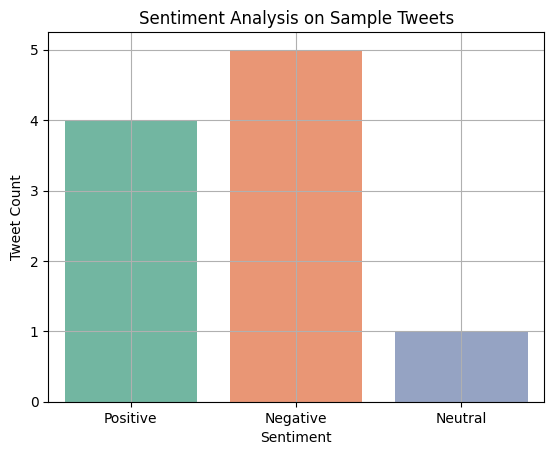

In [5]:
# 📊 Sentiment Distribution
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Analysis on Sample Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.grid(True)
plt.show()

In [7]:
# ☁️ Generate WordClouds
def generate_wordcloud(sentiment, filename):
    text = " ".join(df[df['Sentiment'] == sentiment]['Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Sentiments")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

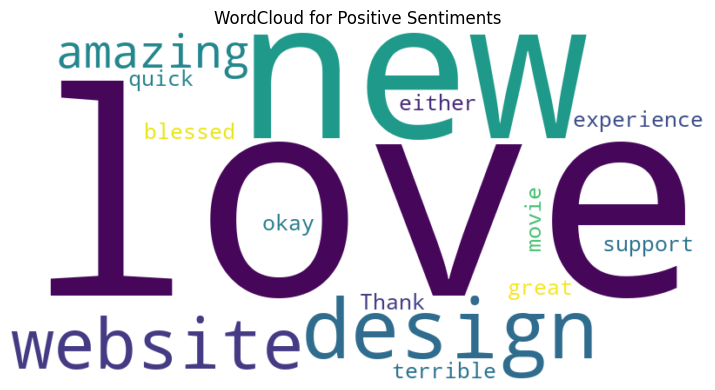

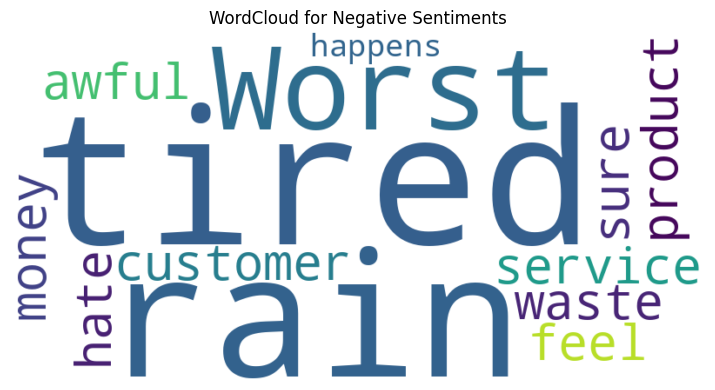

In [10]:
# Generate and save positive and negative word clouds
generate_wordcloud("Positive", "wordcloud_positive.png")
generate_wordcloud("Negative", "wordcloud_negative.png")